In [42]:
"""
importing necessary libraries
"""
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
"""
importing training data
"""
x_train = pd.read_csv('df_train_2.csv') # reading the x_train
x_train

,able,abstract,access,access button,accessories,accessory,accord,accurate,acer,achieve,...,yellow,yellow sapphire,yet,yoga,you,young,youth,zip,zipper,zirconia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
"""
importing testing data
"""
y_train = pd.read_csv('y_train.csv', header = None) # reading the y_train
y_train = np.array(list(y_train[0].values))
y_train = np.array(y_train, dtype = int)
y_train

array([10, 99,  8, ..., 16,  3, 16])

In [25]:
"""
top features in the vocab and their frequency
"""
sum_words = x_train.sum(axis=0) 
features = np.array(list(sum_words.keys())) # storing the features 
count = np.array(list(sum_words.values)) # storing the count of features

In [26]:
order = np.argsort(count)[::-1]
features = features[order] # sorting in descending order
count = count[order]

In [27]:

for i in range(len(features)): 
    print(features[i], count[i])

size 61276
quality 59717
make 57553
design 53433
material 51706
use 49465
product 45180
wear 42723
color 41982
high 40450
cotton 40056
look 39643
cover 38784
fit 36140
strong 34684
perfect 33951
fabric 32480
style 31394
women 31084
men 30003
gift 29928
inch 29240
easy 28545
soft 26742
casual 26094
type 25633
wash 25507
length 25005
long 23473
skin 23196
water 23078
leather 23012
set 22818
one 22807
high quality 22058
case 21851
free 21611
print 21536
comfortable 21367
best 21117
black 20825
stylish 20749
wall 20361
shirt 20205
day 20085
light 20078
give 20060
li 19744
woman 19597
dress 19334
comfort 18814
phone 18522
home 18257
also 18235
provide 18141
fashion 17870
party 17838
made 17823
back 17795
pair 17324
please 17152
colour 17096
care 16937
shoe 16900
top 16658
dry 16568
keep 16326
occasion 15820
premium 15736
time 15723
sleeve 15564
brand 15413
device 15303
hand 15210
protection 15094
durable 14765
battery 14538
clean 14495
charge 14305
laptop 14288
full 14094
room 13891
well 13

tempered glass 2095
occasion casual 2087
home decor 2084
fiber 2084
thickness 2082
shorts 2079
receive 2075
question 2072
girlfriend 2071
data 2070
american 2068
professional 2068
fall 2068
appearance 2065
application 2062
elegance 2060
flop 2060
vivo 2059
artwork 2059
impact 2059
import 2056
tab 2053
quartz 2052
embroidery 2048
eco 2047
cell 2046
delivery 2039
block 2035
great gift 2035
make sure 2034
flip flop 2034
school 2030
br br 2030
appeal 2027
level 2027
sleek 2023
film 2019
wipe 2018
max 2017
net 2017
universal 2016
satisfaction 2013
case cover 2007
nighty 2005
measure 2001
tea 2000
yoga 1998
navy 1997
fold 1996
mild 1996
longer 1995
secure 1995
room bedroom 1987
tumble 1986
easy access 1985
powder 1984
mesh 1981
connector 1979
carefully 1979
thick 1978
woven 1977
unit 1976
package content 1974
amaze 1973
direct 1973
color black 1973
stitched 1970
change 1967
construction 1965
decorate 1964
finger 1961
fits 1961
clothing 1960
drive 1951
protective 1948
activity 1944
please not

computer 1068
note redmi 1068
kept 1067
gold plat 1067
cream 1067
spandex 1066
speed device 1065
handcrafted 1064
insert 1064
adorable 1064
everything 1062
detects connect 1062
off 1061
upgrade 1061
state 1060
thousand 1059
clip 1059
casual shirt 1057
wrinkle 1056
elegant look 1056
guide 1055
shopsgeniune 1055
yellow sapphire 1054
mount 1053
provide best 1053
side pocket 1052
casual formal 1049
connection 1049
best gift 1049
press 1049
htc 1048
smart charge 1048
pair jeans 1046
healing 1046
stability 1045
ethnic wear 1044
entire 1043
artist 1043
manufacturing defect 1043
gallery 1043
sign 1041
promise 1040
offering 1039
and 1037
bumper 1035
headphones 1034
colours 1034
looking 1030
art print 1030
krishna 1030
mid rise 1028
odorize 1028
diy 1028
leather belt 1028
lifetime 1028
style statement 1027
coin 1026
washed 1023
read 1023
connectors 1023
de odorize 1023
tip 1023
instal 1021
moto 1021
remains 1021
fungus 1020
god 1019
crop 1018
achieve 1018
wool 1017
generation 1017
sides 1016
li 

In [28]:
"""
making a dictionary fof top features from the vocabulary
"""
dict_words = {} # adding words and their frequency in a dictionary
for i in range(len(features)):
    dict_words[features[i]] = count[i]
dict_words

{'size': 61276,
 'quality': 59717,
 'make': 57553,
 'design': 53433,
 'material': 51706,
 'use': 49465,
 'product': 45180,
 'wear': 42723,
 'color': 41982,
 'high': 40450,
 'cotton': 40056,
 'look': 39643,
 'cover': 38784,
 'fit': 36140,
 'strong': 34684,
 'perfect': 33951,
 'fabric': 32480,
 'style': 31394,
 'women': 31084,
 'men': 30003,
 'gift': 29928,
 'inch': 29240,
 'easy': 28545,
 'soft': 26742,
 'casual': 26094,
 'type': 25633,
 'wash': 25507,
 'length': 25005,
 'long': 23473,
 'skin': 23196,
 'water': 23078,
 'leather': 23012,
 'set': 22818,
 'one': 22807,
 'high quality': 22058,
 'case': 21851,
 'free': 21611,
 'print': 21536,
 'comfortable': 21367,
 'best': 21117,
 'black': 20825,
 'stylish': 20749,
 'wall': 20361,
 'shirt': 20205,
 'day': 20085,
 'light': 20078,
 'give': 20060,
 'li': 19744,
 'woman': 19597,
 'dress': 19334,
 'comfort': 18814,
 'phone': 18522,
 'home': 18257,
 'also': 18235,
 'provide': 18141,
 'fashion': 17870,
 'party': 17838,
 'made': 17823,
 'back': 177

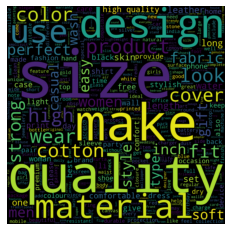

In [32]:
"""
a wordcloud to visulaize the most important features
"""
wordcloud = WordCloud(width=3000, height = 3000, max_words = 500)
wordcloud.generate_from_frequencies(dict_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

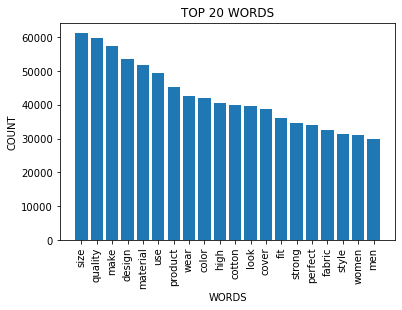

In [34]:
"""
count of top 20 words in the vocabulary
"""
plt.bar(features[0:20], count[0:20])
plt.xticks(rotation = 90)
plt.title("TOP 20 WORDS")
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.savefig('topWords.png')
plt.show()

In [36]:
"""
 obtaining top bigrams
"""
bi_grams = [] 
bi_grams_count = []
for i in range(len(features)):
    words = features[i].split()
    if(len(words) == 2):
        bi_grams.append(" ".join(words))
        bi_grams_count.append(count[i])


In [37]:
"""
printing those top bi-grams
"""
for i in range(len(bi_grams)):
    print(bi_grams[i], bi_grams_count[i])

high quality 22058
light weight 6021
regular fit 5355
care instructions 5332
stainless steel 5202
living room 5133
machine wash 5081
premium quality 5078
redmi redmi 4569
hand wash 4365
round neck 4257
party wear 4178
quality material 4101
wide range 4063
water resistant 4050
fabric cotton 3901
body cover 3857
wash care 3830
perfect gift 3701
size chart 3671
slim fit 3611
seat cover 3600
casual wear 3550
free size 3363
water bottle 3315
li ul 3232
samsung galaxy 3199
wall clock 3195
perfect fit 3194
material cotton 3091
laptop skin 3085
easy install 3073
complete look 3072
back cover 3071
may slightly 3043
best quality 3041
make high 3033
mobile phone 2983
redmi note 2899
comfortable wear 2896
size inch 2873
long lasting 2832
skin friendly 2829
women girls 2829
good quality 2801
half sleeve 2799
sterling silver 2788
cotton fabric 2788
home office 2787
cushion cover 2786
love one 2784
screen protector 2776
easy clean 2746
quality product 2719
daily wear 2705
genuine leather 2693
long la

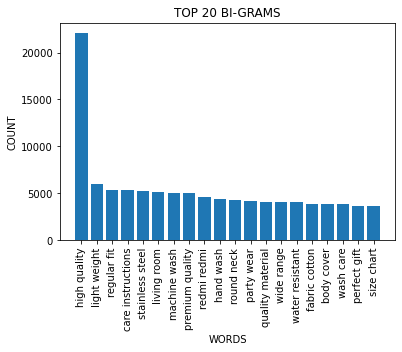

In [44]:
"""
a bar graph showing the count of top 20 bigrams
"""
plt.bar(bi_grams[0:20], bi_grams_count[0:20])
plt.xticks(rotation = 90)
plt.title("TOP 20 BI-GRAMS")
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.show()

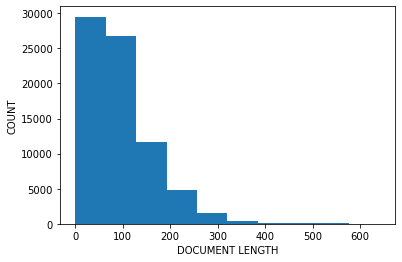

In [71]:
"""
A histogram that shows count of words in a document based on the length of the document
"""
documents_len = x_train.sum(axis=1)
documents_len = np.array(list(documents_len.values))

plt.hist(documents_len)
plt.xlabel("DOCUMENT LENGTH")
plt.ylabel("COUNT")
plt.show()

In [138]:

length = []
category = []
for i in range(1, 10):
    curr_index = (y_train == i)
    x_curr = x_train.iloc[curr_index]
    y_curr = y_train[curr_index]
    n = x_curr.shape[0]
    arr = []
    for j in range(n):
        arr.append(x_curr.iloc[j].sum())
    length.append(arr)
    category.append(i)

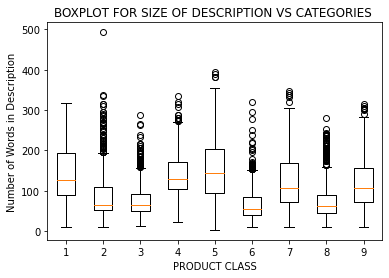

In [141]:
"""
a box plot that shows the variation of document length among various categories
"""
plt.boxplot(length)
plt.xlabel("PRODUCT CLASS")
plt.ylabel("Number of Words in Description")
plt.title("BOXPLOT FOR SIZE OF DESCRIPTION VS CATEGORIES ")
plt.show()